# Busqueda de Raices
En este notebook interactivo vamos a describir e implementar diferente algoritmos de busqueda de raices

$$ f(\mathbf{x}) = \mathbf 0 $$

$$ x^2 = 4 $$
$$ x_1 = 2 $$
$$ x_2 = -2 $$

$$ f(x) = x^2 - 4 = 0 $$

Funciones de prueba:

$$ f_1(x) = x^2 -4 $$
$$ f_2(x) = e^x - x^2 $$

In [24]:
import numpy as np
import matplotlib.pylab as plt

def f1(x):
    return  x*x - 4

def f2(x):
    return np.exp(x) - x*x

In [2]:
xx = np.linspace(-5,5, 50)

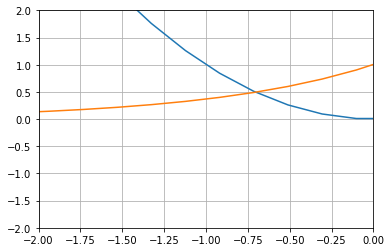

In [3]:
plt.plot(xx,xx*xx)
plt.plot(xx,np.exp(xx))
plt.ylim(-2,2)
plt.xlim(-2,0)
plt.grid()

In [4]:
f2(-.73)

-0.05099100990979749

In [5]:
def biseccion(f, x0, x1, tol=1.0e-3, max_iter=1000):
    xm = (x1+x0)/2 #calculo del punto medio
    i = 0
    while i < max_iter:
        i = i + 1 # proxima iter
        f0 = f(x0)
        f1 = f(x1)
        fm = f(xm)
        print("#iter="+str(i)+" x0=%f; xm=%f; x1=%f;  f(x0)=%f; f(xm)=%f; f(x1)=%f;"%(x0,xm,x1,f0,fm,f1))
    
        if np.abs(fm) < tol:
            print("La raiz esta en x=" + str(xm))
            return xm
    
        if f0*fm < 0:  #cambio de sgn en el primer intervalo
            x1 = xm
        elif fm*f1 < 0:
            x0 = xm
        else: 
            print("No se encontro un cambio de signo en ningun intervalo")
            return
        xm = (x1+x0)/2 
    return 0

In [6]:
biseccion(f1,0,6) 

#iter=1 x0=0.000000; xm=3.000000; x1=6.000000;  f(x0)=-4.000000; f(xm)=5.000000; f(x1)=32.000000;
#iter=2 x0=0.000000; xm=1.500000; x1=3.000000;  f(x0)=-4.000000; f(xm)=-1.750000; f(x1)=5.000000;
#iter=3 x0=1.500000; xm=2.250000; x1=3.000000;  f(x0)=-1.750000; f(xm)=1.062500; f(x1)=5.000000;
#iter=4 x0=1.500000; xm=1.875000; x1=2.250000;  f(x0)=-1.750000; f(xm)=-0.484375; f(x1)=1.062500;
#iter=5 x0=1.875000; xm=2.062500; x1=2.250000;  f(x0)=-0.484375; f(xm)=0.253906; f(x1)=1.062500;
#iter=6 x0=1.875000; xm=1.968750; x1=2.062500;  f(x0)=-0.484375; f(xm)=-0.124023; f(x1)=0.253906;
#iter=7 x0=1.968750; xm=2.015625; x1=2.062500;  f(x0)=-0.124023; f(xm)=0.062744; f(x1)=0.253906;
#iter=8 x0=1.968750; xm=1.992188; x1=2.015625;  f(x0)=-0.124023; f(xm)=-0.031189; f(x1)=0.062744;
#iter=9 x0=1.992188; xm=2.003906; x1=2.015625;  f(x0)=-0.031189; f(xm)=0.015640; f(x1)=0.062744;
#iter=10 x0=1.992188; xm=1.998047; x1=2.003906;  f(x0)=-0.031189; f(xm)=-0.007809; f(x1)=0.015640;
#iter=11 x0=1.998047; x

2.000244140625

In [7]:
biseccion(f1,10,100, tol=1e-6)

#iter=1 x0=10.000000; xm=55.000000; x1=100.000000;  f(x0)=96.000000; f(xm)=3021.000000; f(x1)=9996.000000;
No se encontro un cambio de signo en ningun intervalo


In [8]:
f2(x=-0.7034673690795898)

1.0159194241410319e-07

In [9]:
def newton(f,df,x0, tol=1.0e-3, max_iter=1000 ):
    i = 0
    while i < max_iter:
        i = i + 1
        x0 = x0 - f(x0)/df(x0)
        
        print("Iter#%i;  x=%f"%(i,x0))
        
        if np.abs(f(x0)) < tol :
            print("la raiz esta en x="+str(x0))
            return
    

In [10]:
def df1(x):
    return 2*x

In [11]:
newton(f1,df1,6)

Iter#1;  x=3.333333
Iter#2;  x=2.266667
Iter#3;  x=2.015686
Iter#4;  x=2.000061
la raiz esta en x=2.000061036087587


In [17]:
def biseccion_(f, x0, x1, tol=1.0e-3, max_iter=1000):
    xm = (x1+x0)/2 #calculo del punto medio
    i = 0
    
    out_i = []   #lista de indices de iteracion
    out_xm = []  #Lista de puntos medios
    out_fxm = [] #Lista de f(x_m)
    
    while i < max_iter:
        i = i + 1 # proxima iter
        f0 = f(x0)
        f1 = f(x1)
        fm = f(xm)
        print("#iter="+str(i)+" x0=%f; xm=%f; x1=%f;  f(x0)=%f; f(xm)=%f; f(x1)=%f;"%(x0,xm,x1,f0,fm,f1))
    
        out_i.append(i)
        out_xm.append(xm)
        out_fxm.append(fm)
    
        if np.abs(fm) < tol:
            print("La raiz esta en x=" + str(xm))
            return [out_i, out_xm, out_fxm]  # MAtriz de resultados
    
        if f0*fm < 0:  #cambio de sgn en el primer intervalo
            x1 = xm
        elif fm*f1 < 0:
            x0 = xm
        else: 
            print("No se encontro un cambio de signo en ningun intervalo")
            return
        xm = (x1+x0)/2
        
    return 0

In [26]:
resultado = biseccion_(f1,0,6)

#iter=1 x0=0.000000; xm=3.000000; x1=6.000000;  f(x0)=-4.000000; f(xm)=5.000000; f(x1)=32.000000;
#iter=2 x0=0.000000; xm=1.500000; x1=3.000000;  f(x0)=-4.000000; f(xm)=-1.750000; f(x1)=5.000000;
#iter=3 x0=1.500000; xm=2.250000; x1=3.000000;  f(x0)=-1.750000; f(xm)=1.062500; f(x1)=5.000000;
#iter=4 x0=1.500000; xm=1.875000; x1=2.250000;  f(x0)=-1.750000; f(xm)=-0.484375; f(x1)=1.062500;
#iter=5 x0=1.875000; xm=2.062500; x1=2.250000;  f(x0)=-0.484375; f(xm)=0.253906; f(x1)=1.062500;
#iter=6 x0=1.875000; xm=1.968750; x1=2.062500;  f(x0)=-0.484375; f(xm)=-0.124023; f(x1)=0.253906;
#iter=7 x0=1.968750; xm=2.015625; x1=2.062500;  f(x0)=-0.124023; f(xm)=0.062744; f(x1)=0.253906;
#iter=8 x0=1.968750; xm=1.992188; x1=2.015625;  f(x0)=-0.124023; f(xm)=-0.031189; f(x1)=0.062744;
#iter=9 x0=1.992188; xm=2.003906; x1=2.015625;  f(x0)=-0.031189; f(xm)=0.015640; f(x1)=0.062744;
#iter=10 x0=1.992188; xm=1.998047; x1=2.003906;  f(x0)=-0.031189; f(xm)=-0.007809; f(x1)=0.015640;
#iter=11 x0=1.998047; x

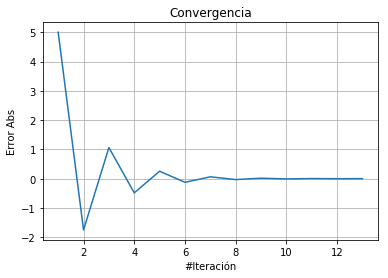

In [30]:
plt.title("Convergencia")
plt.plot(resultado[0],resultado[2])
plt.xlabel("#Iteración")
plt.ylabel("Error Abs")
plt.grid()

#iter=1 x0=0.000000; xm=3.000000; x1=6.000000;  f(x0)=-4.000000; f(xm)=5.000000; f(x1)=32.000000;
#iter=2 x0=0.000000; xm=1.500000; x1=3.000000;  f(x0)=-4.000000; f(xm)=-1.750000; f(x1)=5.000000;
#iter=3 x0=1.500000; xm=2.250000; x1=3.000000;  f(x0)=-1.750000; f(xm)=1.062500; f(x1)=5.000000;
#iter=4 x0=1.500000; xm=1.875000; x1=2.250000;  f(x0)=-1.750000; f(xm)=-0.484375; f(x1)=1.062500;
#iter=5 x0=1.875000; xm=2.062500; x1=2.250000;  f(x0)=-0.484375; f(xm)=0.253906; f(x1)=1.062500;
#iter=6 x0=1.875000; xm=1.968750; x1=2.062500;  f(x0)=-0.484375; f(xm)=-0.124023; f(x1)=0.253906;
#iter=7 x0=1.968750; xm=2.015625; x1=2.062500;  f(x0)=-0.124023; f(xm)=0.062744; f(x1)=0.253906;
#iter=8 x0=1.968750; xm=1.992188; x1=2.015625;  f(x0)=-0.124023; f(xm)=-0.031189; f(x1)=0.062744;
#iter=9 x0=1.992188; xm=2.003906; x1=2.015625;  f(x0)=-0.031189; f(xm)=0.015640; f(x1)=0.062744;
#iter=10 x0=1.992188; xm=1.998047; x1=2.003906;  f(x0)=-0.031189; f(xm)=-0.007809; f(x1)=0.015640;
#iter=11 x0=1.998047; x

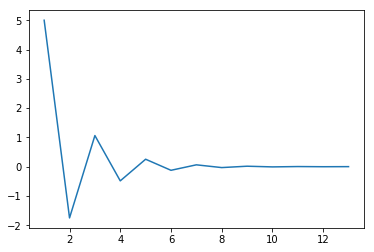

In [27]:
[II,XM,FXM] = biseccion_(f1,0,6)
plt.plot(II,FXM)

In [ ]:
def newton(f,df,x0, tol=1.0e-3, max_iter=1000 ):
    i = 0
    while i < max_iter:
        i = i + 1
        x0 = x0 - f(x0)/df(x0)
        
        print("Iter#%i;  x=%f"%(i,x0))
        
        if np.abs(f(x0)) < tol :
            print("la raiz esta en x="+str(x0))
            return
    